In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string

In [197]:
data = pd.read_csv("data.csv")
data = data.dropna()
data = data.drop_duplicates()
data = data.reset_index(drop=True)

In [189]:
data.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     19999 non-null  object
 1   Emotion  19999 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [191]:
data.describe(include="all")

,Text,Emotion
count,19999,19999
unique,19948,6
top,i will feel as though i am accepted by as well...,joy
freq,2,6760


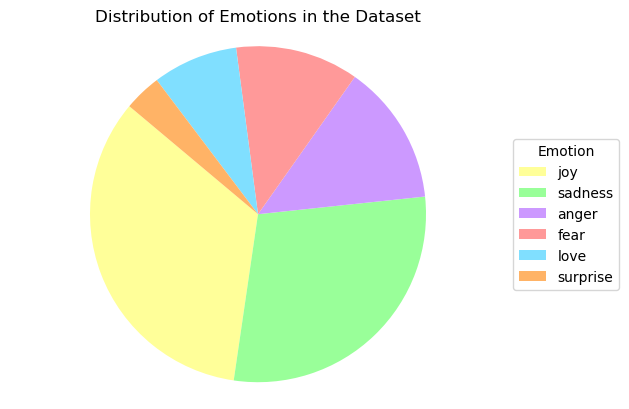

In [192]:
counts = data['Emotion'].value_counts()
colors=["#FFFF99", "#99FF99", "#CC99FF", "#FF9999", "#80DFFF", "#FFB366"]
#lIGHT YELLOW, LIGHT GREEN, LIGHT PURPLE, LIGHT RED, LIGHT BLUE, LIGHT ORANGE
plt.pie(counts,startangle=140, colors=colors)

plt.legend(counts.index, title='Emotion', loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.title('Distribution of Emotions in the Dataset')
plt.show()

In [193]:
def data_preprocessing(text):
    
    tokens = word_tokenize(text)
    
    tokens = [token.lower() for token in tokens]
    
    tokens = [token for token in tokens if token not in string.punctuation]
    
    stopword_list = list(stopwords.words("english"))
    avoid_these = ['not', 'very', 'too', 'never']
    
    result=[]
    for token in tokens:
        if token not in stopword_list:
            result.append(token)
        elif token in avoid_these:    
            result.append(token)
    tokens = result        
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    
    return ' '.join(tokens)


In [194]:
data['Text']=data['Text'].apply(data_preprocessing)

In [195]:
data.head()

,Text,Emotion
0,im feel rather rotten im not very ambitious right,sadness
1,im update blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,leave bouquet red yellow tulips arm feel sligh...,joy
4,feel little vain one,sadness
